# Required Files Installation

In [1]:
!pip install -r requirements.txt
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199774 sha256=15b9f37745b5ad1fdecf31978f30a1709c4cc662ad1ea3e226f

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from gensim.models import Word2Vec
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Uploading Datset

In [3]:
dataset = "articles.csv"
data = pd.read_csv(dataset)
data.head()

,Index,News,Category,category_id
0,1,တီကျစ်ကျောက် မီးသွေးဓာတ်အားပေး စက်ရုံကို သက်တမ...,business,0
1,2,ရန်ကုန်တိုင်းအစိုးရ အစီအစဉ်ဖြင့် ရောင်းချမည့် ...,business,0
2,3,ရန်ကုန်မြို့သစ်စီမံကိန်း အတွက် လမ်းကြောင်းကွန်...,business,0
3,4,ပြည်တွင်း စက်သုံးဆီဈေး ရက်ပိုင်းအတွင်း ပြန်လည်...,business,0
4,5,ကချင်ပြည်နယ် မြစ် ကြီးနားနှင့် ချီဖွေမြို့အတွက...,business,0


# Data Checking and Visualization

In [4]:
data.isnull().sum()

Index          0
News           0
Category       0
category_id    0
dtype: int64

<Axes: xlabel='Category'>

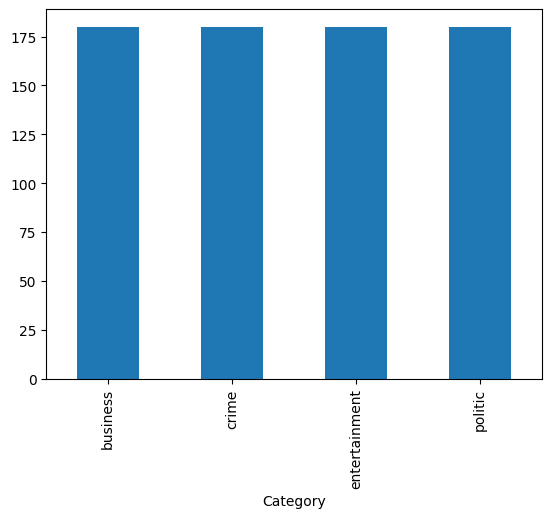

In [5]:
colslist = ['Index','News', 'Category', 'category_id']
data.columns = colslist
data.groupby('Category').Index.count().plot.bar(ylim=0)

In [6]:
# Viewing the data as in whole
list_of_dicts = data.to_dict(orient='records')
list_of_dicts[0]

{'Index': 1,
 'News': 'တီကျစ်ကျောက် မီးသွေးဓာတ်အားပေး စက်ရုံကို သက်တမ်းတိုး ထပ်မံလည်ပတ် ရန် ရှမ်းပြည်နယ်အစိုးရနှင့် ၀န် ကြီးဌာနက ကန့်ကွက်ရန်မရှိ ကြောင်း လျှပ်စစ်နှင့် စွမ်းအင်၀န် ကြီးဌာန ပြောရေးဆိုခွင့်နှင့် သတင်းပြန်ကြားရေး အဖွဲ့က ဇူလိုင် ၁၂ ရက်တွင် သတင်းထုတ်ပြန်သည်။ ရှမ်းပြည်နယ်ရှိ ကျောက်မီး သွေးသုံး ဓာတ်အားပေးစက်ရုံကို ၂၀၁၇ မေလ ၂၆ ရက်တွင် စမ်း သပ်လည်ပတ်ရာ တစ်နှစ်ပြည့် ၍ ထပ်မံသက်တမ်းတိုးရန် စီစဉ် နေပြီး လက်ရှိ၌ ပြည်ထောင်စု အစိုးရအဖွဲ့နှင့် သမ္မတရုံးသို့ တင်ပြထားကြောင်း လျှပ်စစ်ဓာတ် အားထုတ်လုပ်ရေးလုပ်ငန်း ဦးဆောင်ညွှန်ကြားရေးမှူး ဦးခင်မောင်၀င်းက ပြောသည်။ ‘‘အရင်တုန်းက ပြာတွေ ထွက်တယ်။ မီးခိုးနံ့တွေ ထွက် တယ်။ ဟိုတုန်းကစက်တွေ ဟောင်းစုတ်နေပါပြီ။ အခုစက်တွေပြင် ပြီးသွားပြီ။ ကမ္ဘာ့ဘဏ်သတ်မှတ် ချက်နှုန်း ပတ်၀န်းကျင်ထိန်းသိမ်း ရေး ၀န်ကြီးဌာနက သတ်မှတ်ထားတဲ့ ဂိုက်လိုင်းအတိုင်း ဒီအတွင်းထဲ မှာ ပြင်ပြီးသွားပြီ’’ဟု ၎င်းကဆက် လက်ပြောသည်။ အဆိုပါ စက်ရုံကို တရုတ် ကုမ္ပဏီက စနစ်တကျပြုပြင်ကာ အမျိုးသား ပတ်၀န်းကျင်ဆိုင်ရာ အရည်အသွေး (ထုတ်လွှတ်မှု) လမ်းညွှန်ချက်များနှင့် ကမ္ဘာ့ဘဏ်၏ သတ်မှတ်ချက် စံချိန်စံညွှန်းမျာ

# Data Preprocessing

### Convert the Article to Sentences

In [7]:
final_dict_list=[]
for obj in list_of_dicts:
    text = obj['News']
    sentences = text.split("။")
    # Remove any empty strings resulting from consecutive delimiters
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    my_dict_list = [{"Index":obj['Index'],"News": item, "Category":obj['Category'],"category_id":obj['category_id']} for item in sentences]
    final_dict_list.extend(my_dict_list)
data_list = [{'Index': i+1, 'News': item['News'], 'Category': item['Category'], 'category_id': item['category_id']} for i, item in enumerate(final_dict_list)]

In [8]:
data = pd.DataFrame(data_list)
data.head()

,Index,News,Category,category_id
0,1,တီကျစ်ကျောက် မီးသွေးဓာတ်အားပေး စက်ရုံကို သက်တမ...,business,0
1,2,ရှမ်းပြည်နယ်ရှိ ကျောက်မီး သွေးသုံး ဓာတ်အားပေးစ...,business,0
2,3,‘‘အရင်တုန်းက ပြာတွေ ထွက်တယ်,business,0
3,4,မီးခိုးနံ့တွေ ထွက် တယ်,business,0
4,5,ဟိုတုန်းကစက်တွေ ဟောင်းစုတ်နေပါပြီ,business,0


In [9]:
data.isnull().sum()

Index          0
News           0
Category       0
category_id    0
dtype: int64

### Visualization the segmented sentences for each category.

<Axes: xlabel='Category'>

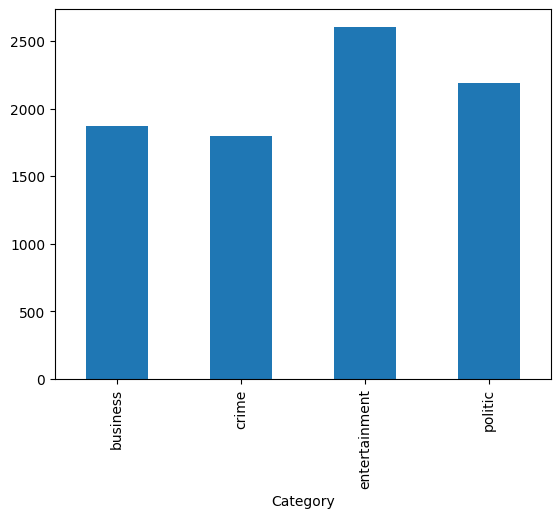

In [10]:
colslist = ['Index','News', 'Category', 'category_id']
data.columns = colslist
data.groupby('Category').Index.count().plot.bar(ylim=0)

### Stopword Loading

In [11]:
stopwordslist = []
slist = []
with open("stopwords.txt", encoding = 'utf8') as stopwordsfile:
    stopwords = stopwordsfile.readlines()
    slist.extend(stopwords)
    for w in range(len(slist)):
        temp = slist[w]
        stopwordslist.append(temp.rstrip())

In [12]:
for i in stopwordslist:
  print(i)

က
ကတည်းက
ကတော့
ကပ
ကဘာ
ကရ
ကလ
ကလူ
ကာ
ကာလ
ကို
ကိုယ့်
ကိုယ်တိုင်
ကုန်
ကေ
ကော
ကဲ
ကျ
ကျန
ကျော်
ကျွန်တော့်
ကျွန်တော်
ကျွန်မ
ကြ
ကြာ
ကြာတော့
ကြိမ်မြောက်
ကြီး
ကြောင်း
ခင်
ခဏခဏ
ခန့်
ခါ
ခု
ခုချိန်
ခဲ့
ခံ
ချ
ချင်
ချင်း
ချိန်
ခြင်း
စက
စဉ်
စရာ
စသည့်
စာ
စီ
စီး
စု
စုံ
စေ
စေသော
စွာ
ဆ
ဆက်
ဆန
ဆို
ဆိုင်ရာ
ဆိုပြီး
ဆိုသည်
ည
ညနေ
ညီ
တ
တကယ်
တက်
တချို့
တခြား
တင်
တစ်ဆင့်
တစ်ဦး
တည်း
တတ်
တန
တယ်
တာ
တာကို
တို
တိုင်း
တို့
တို့သည်
တိုး
တီ
တုန်း
တော့
တော်
တော်တော်လေး
တဲ့
တွင်
တွေ
တွေ့
ထက်
ထင်
ထပ်
ထား
ထားသည်
ထိ
ထို
ထိုသို့
ထို့အပြင်
ထုတ်
ထူး
ထဲ
ထဲက
ထံ
ထွက်
ထွန်း
ထွေ
ထွေထွေထူးထူး
ဒါ
ဒါကို
ဒါကြောင့်
ဒါတွေ
ဒါတွေက
ဒါနဲ့
ဒါပေမဲ့
ဒါလေး
ဒါ့အပြင်
ဒီ
ဒီထက်
ဒီနေ့
ဒီမှာ
ဒီလို
ဒု
နက်
နဂို
နည်း
နား
နိုင်
နိုင်သည်
နီ
နေ
နေကျ
နောက်
နောက်ဆုံး
နောက်တစ်ခု
နောက်ထပ်
နောက်ပြီး
နော့
နော်
နေ့
နဲ့
နှင့်
နှင့်အတူ
ပ
ပင
ပတ
ပတ်သက်
ပါ
ပါပ
ပါဝင်
ပါသည်
ပိတ်
ပို
ပိုင်း
ပိုမို
ပို့
ပုံ
ပေ
ပေါ
ပေါင်း
ပေါ့
ပေါ်
ပေး
ပျော်
ပြ
ပြန်
ပြီ
ပြီး
ပြီးခဲ့သည့်
ပြီးတော့
ပြု
ပြော
ပြောကြား
ပြောသည်
ပြဲ
ပွဲ
ဖ
ဖက်
ဖို့
ဖူး
ဖော်
ဖြင့်
ဖြစ်
ဖြစ်ကြောင်း
ဖြစ်တယ်
ဖြစ်ပါတယ်
ဖြစ

### Preprocessing

In [13]:
import pyidaungsu as pds
import re

# CleanPattern = re.compile(r'\d+|[၊။!-/:_\'’"”■—[-`{-~\t ]|[A-Za-z0-9]')
CleanPattern = re.compile(r'\d+|[၊။!-/:_\'’"”■—[-`{-~\t ]')
def clean_sentence(sentence):
     # sentence = sentence.replace("_"," ")
     sent = CleanPattern.sub(" ",str(sentence))
     return sent

# Removed everything from the stopword list.
def stop_word(sentence):
  new_sentence = []
  for word in sentence.split():
    if word not in stopwordslist:
      new_sentence.append(word)
  return(' '.join(new_sentence))


def tokenize(line): # Changing it into one word structure.
    line = clean_sentence(line)
    sentence = pds.tokenize(line,form="word")
    sentence = ' '.join([str(elem) for elem in sentence])
    sentence = stop_word(sentence)
    return sentence

data['News'] = data['News'].apply(tokenize)
data.head(10)


# One or more digits.
# Specific Burmese characters (၊။).
# Various special characters.
# Uppercase and lowercase letters.

,Index,News,Category,category_id
0,1,တီကျစ်ကျောက်မီးသွေး ဓာတ်အားပေး စက်ရုံ သက်တမ်း ...,business,0
1,2,ရှမ်း ပြည်နယ် ကျောက်မီးသွေးသုံး ဓာတ်အားပေး စက်...,business,0
2,3,အရင်တုန်းကပြာ,business,0
3,4,မီးခိုးနံ့,business,0
4,5,ဟိုတုန်း စက် ဟောင်းစုတ်,business,0
5,6,စက် ပြင်,business,0
6,7,ကမ္ဘာ့ ဘဏ် သတ်မှတ် ချက်နှုန်းပတ်န်းကျင် ထိန်းသ...,business,0
7,8,စက်ရုံ တရုတ် ကုမ္ပဏီ စနစ်တကျ ပြုပြင် အမျိုးသား...,business,0
8,9,အဆို ပါတီ ကျစ်ကျောက်မီးသွေး စက်ရုံ တရုတ် WuxiH...,business,0
9,10,စက်ရုံ လျှပ်စစ်ဓာတ်အား စက်တပ်ဆင် မဂ္ဂါပ် မဂ္ဂါ...,business,0


### Saving Structured and Clean Dataset File.

In [14]:
csv_file_path = '/content/preprocessed.csv'  # Change the path as needed
data.to_csv(csv_file_path, index=False)

## Applying Train Test Split for Model Training.

- Splitted each and every categories equally with ratio of 80-20 Train and test.

- This will be helpful when we want to feed the model with equal number of sample size from each category in order to perform equally better on each categories.

In [15]:
from sklearn.model_selection import train_test_split
# Assuming your dataset has columns News,Category
features = data['News']
labels = data['Category']

In [16]:
data.shape[0]

8464

In [17]:
train_data_list = []
test_data_list = []

# Iterate over each unique class and split the data
for category in labels.unique():
    # Filter data for the current category
    category_data = data[data['Category'] == category]

    # Split the data into train and test sets (80% train, 20% test)
    train_set, test_set = train_test_split(category_data, test_size=0.2, random_state=42)

    # Append the train and test sets to the respective lists
    train_data_list.append(train_set)
    test_data_list.append(test_set)

# Create DataFrames from the lists
train_data = pd.concat(train_data_list, ignore_index=True)
test_data = pd.concat(test_data_list, ignore_index=True)

In [18]:
train_data.shape[0]

6769

In [19]:
test_data.shape[0]

1695

##  Assigning Train and Test Data for model training

In [20]:
# For Training

train_data = train_data[["News", "Category"]]

X_train = np.array(train_data["News"])
y_train = np.array(train_data["Category"])

In [21]:
# For Testing

test_data = test_data[["News", "Category"]]

X_test = np.array(test_data["News"])
y_test = np.array(test_data["Category"])

In [22]:
X_train.shape

(6769,)

In [23]:
X_test.shape

(1695,)

In [24]:
y_train

array(['business', 'business', 'business', ..., 'politic', 'politic',
       'politic'], dtype=object)

In [25]:
y_test

array(['business', 'business', 'business', ..., 'politic', 'politic',
       'politic'], dtype=object)

# Applying Vectorization

In [26]:
def tokenize(line):
    sentence = pds.tokenize(line,form="word")
    return sentence


tokenized_train_data = [tokenize(doc.lower()) for doc in X_train]

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_train_data, vector_size=100, window=5, min_count=1, workers=4)

# Function to vectorize a document
def vectorize_document(document, model):
    tokens = [token.lower() for token in tokenize(document)]
    vectors = [model.wv[token] for token in tokens if token in model.wv.key_to_index]

    if vectors:
        vector = np.mean(vectors, axis=0)
        return vector
    else:
        return np.zeros(model.vector_size)

# Vectorize the training and testing data
X_train_vec = [vectorize_document(doc, word2vec_model) for doc in X_train]
X_test_vec = [vectorize_document(doc, word2vec_model) for doc in X_test]

# Convert to numpy arrays
X_train_vec = np.array(X_train_vec)
X_test_vec = np.array(X_test_vec)

# Convert vectors to non-negative values (required for MultinomialNB)
X_train_vec_non_negative = X_train_vec - np.min(X_train_vec)
X_test_vec_non_negative = X_test_vec - np.min(X_test_vec)


# # Tokenize the text data
# tokenized_data = [tokenize(doc.lower()) for doc in X_train]

# # Train a Word2Vec model
# word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# # Function to vectorize a document
# def vectorize_document(document, model):
#     tokens = [token.lower() for token in word_tokenize(document)]
#     vector = np.mean([model.wv[token] for token in tokens if token in model.wv.key_to_index], axis=0)
#     return vector if vector is not None else np.zeros(model.vector_size)

#
# vectorizer = TfidfVectorizer(tokenizer=tokenize,ngram_range=(1,2))
# # X_train = vectorizer.fit_transform(X_train)
# # X_test = vectorizer.fit_transform(X_test)

# X_train = vectorizer.fit_transform(X_train)  # Fit and transform on the training data
# X_test = vectorizer.transform(X_test)  # Transform using the same vectorizer on the test data

##Optimization

In [27]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import TruncatedSVD
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, classification_report

In [28]:
# tokenized_train_data = [tokenize(doc.lower()) for doc in X_train]

# # Define the Word2Vec model
# word2vec_model = Word2Vec(vector_size=50, window=5, min_count=1, workers=4)

# # Function to vectorize a document
# def vectorize_document(document, model):
#     tokens = [token.lower() for token in tokenize(document)]
#     vectors = [model.wv[token] for token in tokens if token in model.wv.key_to_index]

#     if vectors:
#         vector = np.mean(vectors, axis=0)
#         return vector
#     else:
#         return np.zeros(model.vector_size)

# # Vectorize the training and testing data
# X_train_vec = [vectorize_document(doc, word2vec_model) for doc in X_train]
# X_test_vec = [vectorize_document(doc, word2vec_model) for doc in X_test]

# # Convert to numpy arrays
# X_train_vec = np.array(X_train_vec)
# X_test_vec = np.array(X_test_vec)

# # Convert vectors to non-negative values (required for MultinomialNB)
# X_train_vec_non_negative = X_train_vec - np.min(X_train_vec)
# X_test_vec_non_negative = X_test_vec - np.min(X_test_vec)

# # Create a pipeline with a classifier (MultinomialNB in this case)
# # and apply Truncated SVD (PCA) for dimensionality reduction
# pipeline = Pipeline([
#     ('reduce_dim', TruncatedSVD()),
#     ('classify', MultinomialNB())
# ])

# # Define the parameter grid for the grid search
# param_grid = {
#     'reduce_dim__n_components': [50, 100, 200],  # Adjust based on your needs
#     'classify__alpha': [0.1, 0.5, 1.0],
# }

# # Perform grid search
# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_vec_non_negative, y_train)

# # Print the best parameters and their corresponding accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)

# # Use the best model to make predictions on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_vec_non_negative)

# # Evaluate the classifier
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy on Test Set: {accuracy}")
# print("Classification Report:\n", report)

When you use the fit_transform method on the training data with the TfidfVectorizer, it not only transforms the data but also learns the vocabulary and other parameters. When you later use the same vectorizer to transform the test data, it applies the same transformations and uses the vocabulary learned from the training data. This ensures that the dimensions (number of features) of the training and test data match.

In [29]:
X_train_vec.shape

(6769, 100)

In [30]:
X_test_vec.shape

(1695, 100)

In [31]:
y_train.shape

(6769,)

In [32]:
y_test.shape

(1695,)

In [33]:
# X_train[0:5]

In [34]:
# import pickle
# pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

# Training with Different Models

### Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec_non_negative, y_train)

MultinomialNB()

In [36]:
y_pred = model.predict(X_test_vec_non_negative)

In [37]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier MultinomialNB():
               precision    recall  f1-score   support

     business       0.47      0.15      0.23       375
        crime       0.00      0.00      0.00       359
entertainment       0.33      0.79      0.47       522
      politic       0.33      0.24      0.28       439

     accuracy                           0.34      1695
    macro avg       0.28      0.30      0.24      1695
 weighted avg       0.29      0.34      0.27      1695




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Linear SVM

In [38]:
# Import classifiers and performance metrics
from sklearn import svm, metrics

# linear kernel model
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train_vec, y_train)

# predict
y_pred = svm_model.predict(X_test_vec)

In [39]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {svm_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC():
               precision    recall  f1-score   support

     business       0.67      0.39      0.50       375
        crime       0.60      0.02      0.03       359
entertainment       0.44      0.75      0.55       522
      politic       0.46      0.61      0.53       439

     accuracy                           0.48      1695
    macro avg       0.54      0.44      0.40      1695
 weighted avg       0.53      0.48      0.42      1695




In [40]:
# Import classifiers and performance metrics
from sklearn import svm, metrics

# linear kernel model
svm_model1 = svm.SVC(kernel='linear')
svm_model1.fit(X_train_vec, y_train)

# predict
y_pred = svm_model1.predict(X_test_vec)

In [41]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {svm_model1}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(kernel='linear'):
               precision    recall  f1-score   support

     business       0.66      0.45      0.53       375
        crime       0.67      0.16      0.26       359
entertainment       0.46      0.84      0.60       522
      politic       0.61      0.57      0.59       439

     accuracy                           0.54      1695
    macro avg       0.60      0.50      0.49      1695
 weighted avg       0.59      0.54      0.51      1695




### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=1)
rf_model.fit(X_train_vec, y_train)

# predict
y_pred = rf_model.predict(X_test_vec)

In [43]:
# confusion matrix and accuracy
from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier RandomForestClassifier(n_jobs=1):
               precision    recall  f1-score   support

     business       0.68      0.61      0.64       375
        crime       0.57      0.51      0.53       359
entertainment       0.57      0.68      0.62       522
      politic       0.62      0.59      0.61       439

     accuracy                           0.60      1695
    macro avg       0.61      0.60      0.60      1695
 weighted avg       0.61      0.60      0.60      1695




### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train_vec, y_train)

# predict
y_pred = dt_model.predict(X_test_vec)

In [45]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {dt_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier DecisionTreeClassifier(random_state=0):
               precision    recall  f1-score   support

     business       0.53      0.51      0.52       375
        crime       0.38      0.43      0.41       359
entertainment       0.53      0.48      0.50       522
      politic       0.51      0.53      0.52       439

     accuracy                           0.49      1695
    macro avg       0.49      0.49      0.49      1695
 weighted avg       0.49      0.49      0.49      1695




### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
error = []
best_k = dict()

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train_vec, y_train)
    pred_i = knn.predict(X_test_vec)
    error.append(np.mean(pred_i != y_test))
    best_k[i] = np.mean(pred_i != y_test)

best_k = sorted(best_k.items(), key=lambda k: k[1])[0][0]
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_classifier.fit(X_train_vec, y_train)
y_pred = knn_classifier.predict(X_test_vec)

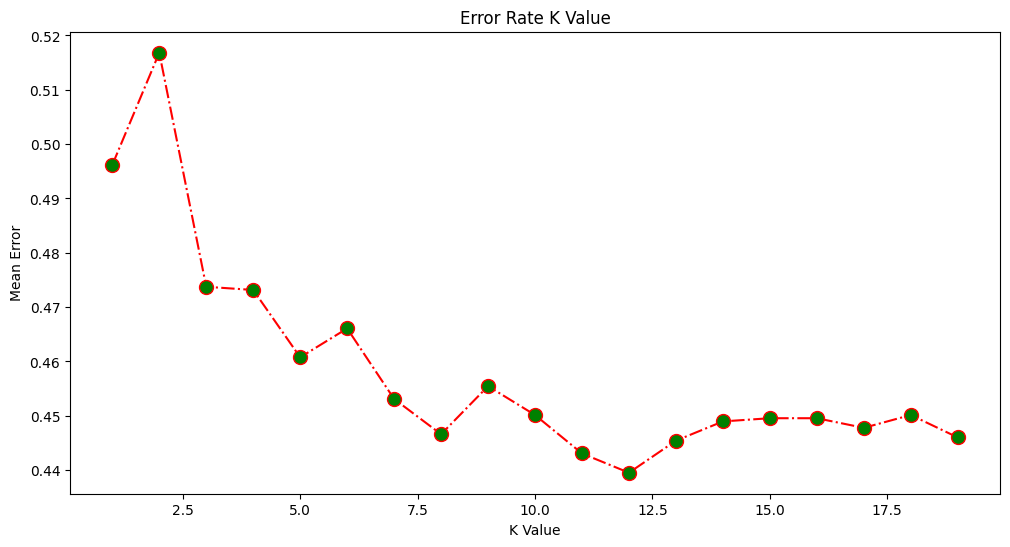

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashdot', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [48]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {knn_classifier}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier KNeighborsClassifier(n_jobs=-1, n_neighbors=12):
               precision    recall  f1-score   support

     business       0.62      0.61      0.61       375
        crime       0.46      0.50      0.48       359
entertainment       0.56      0.60      0.58       522
      politic       0.62      0.52      0.57       439

     accuracy                           0.56      1695
    macro avg       0.56      0.56      0.56      1695
 weighted avg       0.57      0.56      0.56      1695




# Evaluating Features

In [49]:
# feature_names = vectorizer.get_feature_names_out()
# for i in feature_names:
#   print(i)

# Loading Best Model

In [50]:
# save the model to disk
import pickle
from sklearn.pipeline import make_pipeline

filename = 'svm_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [51]:
line = "ဒီကနေ့ ဒီဇင်ဘာလ ၂၁ ရက်နေ့ နေ့လယ်ပိုင်းမှာလည်း ရေဦးနဲ့ တန့်ဆည်မြို့နယ် နယ်နမိတ်ထိစပ်နေတဲ့နေရာနားက လိပ်ခြံရွာက ပီဒီအက်ဖ်စခန်းတွေလို့ ယူဆတဲ့နေရာတွေကို စစ်ကောင်စီတပ်ရဲ့ ရဟတ်ယာဉ်တွေက ပစ်ခတ်တာတွေ ဆက်လုပ်ခဲ့တယ်လို့ ဒေသခံတွေထံက သိရပါတယ်။"

In [52]:
tokenize(line)
#"ဒီကနေ့ ဒီဇင်ဘာလ ၂၁ ရက်နေ့ နေ့လယ်ပိုင်းမှာလည်း ရေဦးနဲ့ တန့်ဆည်မြို့နယ် နယ်နမိတ်ထိစပ်နေတဲ့နေရာနားက လိပ်ခြံရွာက ပီဒီအက်ဖ်စခန်းတွေလို့ ယူဆတဲ့နေရာတွေကို
# စစ်ကောင်စီတပ်ရဲ့ ရဟတ်ယာဉ်တွေက ပစ်ခတ်တာတွေ ဆက်လုပ်ခဲ့တယ်လို့ ဒေသခံတွေထံက သိရပါတယ်။"

['ဒီ',
 'က',
 'နေ့',
 'ဒီဇင်ဘာ',
 'လ',
 '၂၁',
 'ရက်နေ့',
 'နေ့လယ်',
 'ပိုင်း',
 'မှာ',
 'လည်း',
 'ရေဦး',
 'နဲ့',
 'တန့်ဆည်',
 'မြို့နယ်',
 'နယ်နမိတ်',
 'ထိစပ်',
 'နေ',
 'တဲ့',
 'နေရာ',
 'နားကလိပ်ခြံ',
 'ရွာ',
 'က',
 'ပီဒီအက်ဖ်စခန်း',
 'တွေ',
 'လို့',
 'ယူဆ',
 'တဲ့',
 'နေရာ',
 'တွေ',
 'ကို',
 'စစ်ကောင်စီ',
 'တပ်',
 'ရဲ့',
 'ရဟတ်ယာဉ်',
 'တွေ',
 'က',
 'ပစ်ခတ်',
 'တာ',
 'တွေ',
 'ဆက်လုပ်',
 'ခဲ့',
 'တယ်',
 'လို့',
 'ဒေသခံ',
 'တွေ',
 'ထံ',
 'က',
 'သိရ',
 'ပါ',
 'တယ်',
 '။']

# Prediction

In [53]:
#CleanPattern = re.compile(r'\d+|[၊။!-/:_\'’"”■—[-`{-~\t ]|[A-Za-z0-9]')
CleanPattern = re.compile(r'\d+|[၊။!-/:_\'’"”■—[-`{-~\t ]')
def clean_sentence(sentence):
    sent = CleanPattern.sub(" ", str(sentence))
    return sent

def stop_word(sentence):
    new_sentence = []
    for word in sentence.split():
        if word not in stopwordslist:
            new_sentence.append(word)
    return ' '.join(new_sentence)

def tokenize(line):
    line = clean_sentence(line)
    sentence = pds.tokenize(line, form="word")
    sentence = ' '.join([str(elem) for elem in sentence])
    sentence = stop_word(sentence)
    return sentence

In [54]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [55]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [56]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [57]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [61]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = vectorize_document(user, word2vec_model)
# output = loaded_model.predict(data)
# print(output)

# End of the Topic Classification

---